## Introduzione

### Descrizione del Dataset

Il [dataset](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) si compone di 1885 occorrenze, una per ogni intervistato, relativamente alla frequenza di utilizzo delle 18 droghe (legali e non) proposte.
Sono inoltre presenti alcuni dati statistici relativi alla persona intervistata come età, sesso, nazionalità, etnia e diversi indici di personalità.

### Dipendenze

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.formula.api import ols, logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### Acquisizione Dati

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('drug_consumption.data', header=None)
drugs_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
person_labels = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
data.columns = ['ID'] + person_labels + drugs_labels

Di seguito è mostrata la struttura del dataset

In [5]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Pre-processing dei dati

#### Valori duplicati

Il dataset non presenta record duplicati, il che è confermato dal codice di seguito il quale mostra che, dopo aver rimosso eventuali record duplicati, abbiamo sempre 1885 occorrenze.

In [7]:
#check duplicate records
data.drop_duplicates().count()

ID           1885
Age          1885
Gender       1885
Education    1885
Country      1885
Ethnicity    1885
Nscore       1885
Escore       1885
Oscore       1885
Ascore       1885
Cscore       1885
Impulsive    1885
SS           1885
Alcohol      1885
Amphet       1885
Amyl         1885
Benzos       1885
Caff         1885
Cannabis     1885
Choc         1885
Coke         1885
Crack        1885
Ecstasy      1885
Heroin       1885
Ketamine     1885
Legalh       1885
LSD          1885
Meth         1885
Mushrooms    1885
Nicotine     1885
Semer        1885
VSA          1885
dtype: int64

#### Valori mancanti

Il dataset non ha nemmeno valori mancanti, come mostrato dal codice seguente

In [8]:
#check NA
data.isna().sum().sum()

0

#### Rimozione dati non attendibili

"Semer" è una droga fittizia, introdotta per scovare eventuali utenti disonesti.
Il seguente codice rimuove tutti i record in cui l'intervistato sostiene di far uso di questa droga inesistente

In [9]:
data = data[data['Semer'] == 'CL0']
len(data)

1877

Rimuoviamo la colonna relativa alla droga fittizia

In [10]:
data = data.drop('Semer', axis=1)
drugs_labels.remove('Semer')

#### Mappatura classi

Le classi relativi alla frequenza di utilizzo delle droghe sono valorizzate da 7 classi:
|  Value  |    Description   |
|---------|-------------------------|
|   CL0   |       Never Used        |
|   CL1   |  Used over a Decade Ago |
|   CL2   |    Used in Last Decade  |
|   CL3   |     Used in Last Year   | 
|   CL4   |     Used in Last Month  | 
|   CL5   |     Used in Last Week   | 
|   CL6   |     Used in Last Day    |

Dato che gli algoritmi lavorano meglio con i numeri interi piuttosto che con le stringhe, rimuoviamo la parte iniziale del valore

In [11]:
#convert classes into integer
data[drugs_labels] = data[drugs_labels].apply(lambda c: c.map(lambda x: int(x.lstrip('CL'))), axis=1)

In [12]:
for drug in drugs_labels:
    col_name = f'{drug}_user'
    data.insert(data.columns.get_loc(f'{drug}')+1, col_name, data[drug].isin([5, 6]).astype(int))

data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Alcohol_user,Amphet,Amphet_user,Amyl,Amyl_user,Benzos,Benzos_user,Caff,Caff_user,Cannabis,Cannabis_user,Choc,Choc_user,Coke,Coke_user,Crack,Crack_user,Ecstasy,Ecstasy_user,Heroin,Heroin_user,Ketamine,Ketamine_user,Legalh,Legalh_user,LSD,LSD_user,Meth,Meth_user,Mushrooms,Mushrooms_user,Nicotine,Nicotine_user,VSA,VSA_user
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,1,2,0,0,0,2,0,6,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,1,2,0,2,0,0,0,6,1,4,0,6,1,3,0,0,0,4,0,0,0,2,0,0,0,2,0,3,0,0,0,4,0,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,1,0,0,0,0,0,0,6,1,3,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,0,0,0,3,0,5,1,2,0,4,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,0,1,0,1,0,0,0,6,1,3,0,6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,1,0,0,0,0,0,0,4,0,5,1,4,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,1,0,0,0,0,0,0,5,1,3,0,4,0,0,0,0,0,2,0,0,0,0,0,3,0,5,1,4,0,4,0,5,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,0,6,1,5,1,5,1,6,1,6,1,6,1,4,0,0,0,4,0,0,0,2,0,0,0,2,0,0,0,2,0,6,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,1,0,0,0,0,0,0,6,1,6,1,5,1,0,0,0,0,3,0,0,0,0,0,3,0,3,0,0,0,3,0,4,0,0,0


In [13]:
drugs_columns  = [col for col in data.columns if any(col == drug_name + '_user' for drug_name in drugs_labels)]
# Aggiunta di una nuova colonna 'NumeroDroghe' al DataFrame
data['drugs_user_count'] = data[drugs_columns].sum(axis=1)

data['drugs_user_count']

0       3
1       3
2       2
3       1
4       2
       ..
1880    3
1881    4
1882    7
1883    4
1884    3
Name: drugs_user_count, Length: 1877, dtype: int64

### Esplorazione statistica

In [14]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Alcohol_user,Amphet,Amphet_user,Amyl,Amyl_user,Benzos,Benzos_user,Caff,Caff_user,Cannabis,Cannabis_user,Choc,Choc_user,Coke,Coke_user,Crack,Crack_user,Ecstasy,Ecstasy_user,Heroin,Heroin_user,Ketamine,Ketamine_user,Legalh,Legalh_user,LSD,LSD_user,Meth,Meth_user,Mushrooms,Mushrooms_user,Nicotine,Nicotine_user,VSA,VSA_user,drugs_user_count
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,943.079915,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,0.671817,1.337773,0.086308,0.606819,0.009057,1.461907,0.095365,5.484283,0.879595,2.980288,0.342568,5.109750,0.791156,1.156633,0.031433,0.295685,0.005860,1.309536,0.044752,0.372403,0.015450,0.564198,0.019712,1.353223,0.069792,1.053277,0.035695,0.826319,0.064465,1.177944,0.022376,3.194992,0.406500,0.429409,0.011188,3.603090
std,544.601919,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,0.469677,1.782384,0.280893,1.064005,0.094762,1.869193,0.293797,1.115119,0.325521,2.286778,0.474695,1.085716,0.406591,1.510791,0.174532,0.835925,0.076349,1.647373,0.206815,1.034761,0.123368,1.216341,0.139047,1.790881,0.254864,1.484582,0.185579,1.648379,0.245644,1.459212,0.147943,2.415814,0.491311,0.959160,0.105208,1.628521
min,1.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.000000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,944.000000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,3.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000
75%,1413.000000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,6.000000,1.000000,5.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,0.000000,0.000000,4.000000
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,1.000000,6.000000,1.000000,6.000000,1.000000,

### Esplorazione visuale

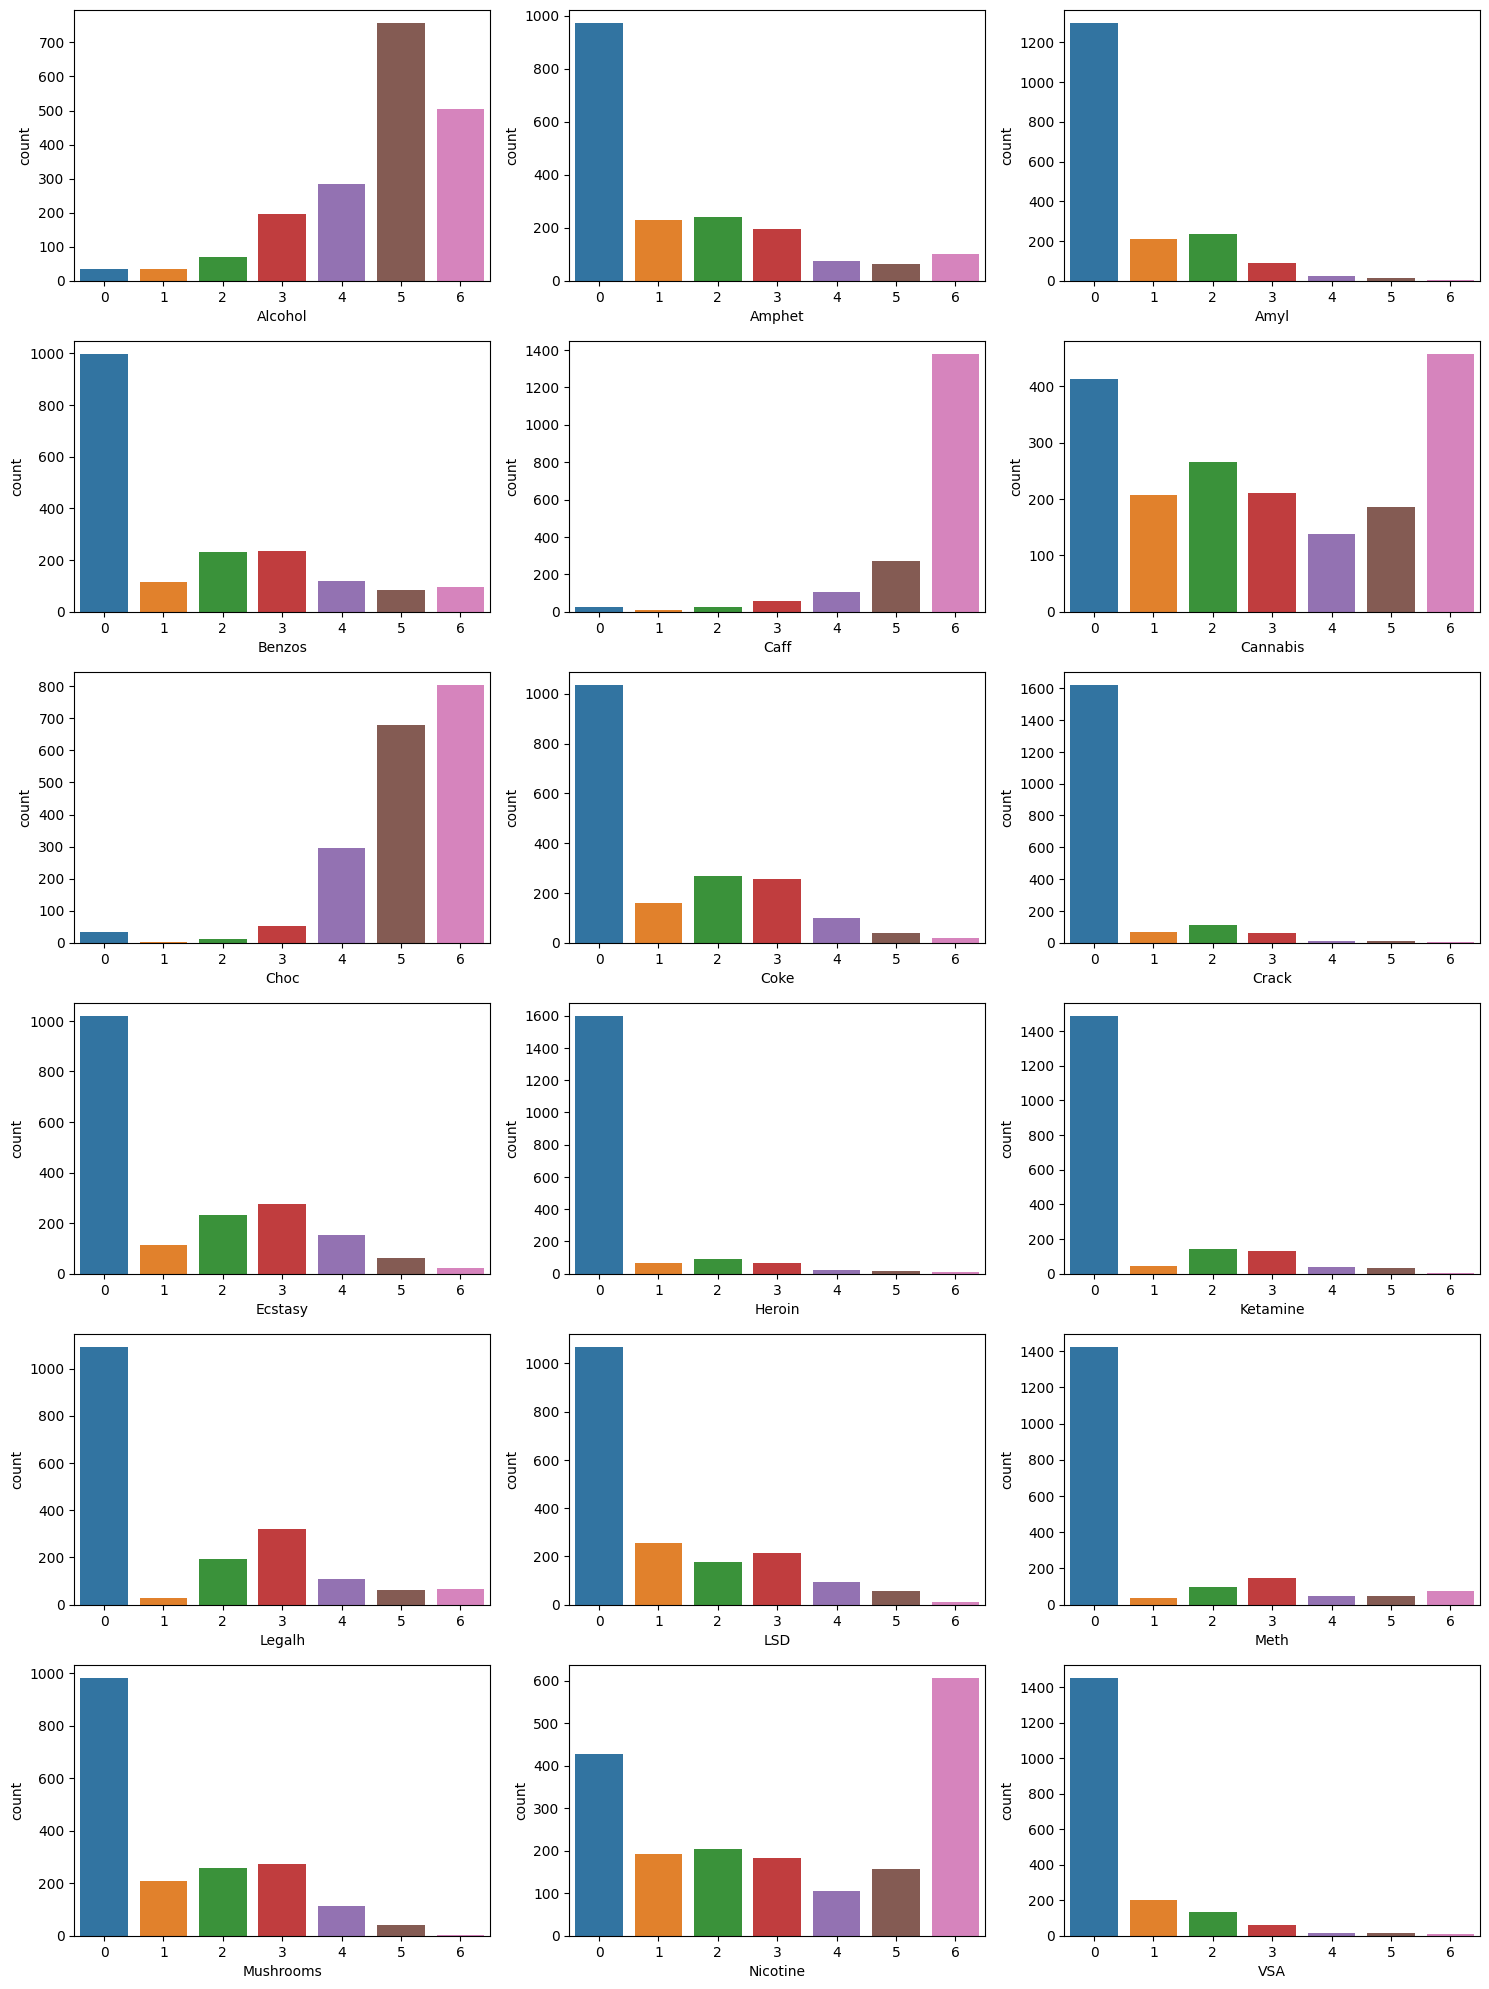

In [15]:
fig, axes = plt.subplots(6, 3, figsize = (15,20))

df = data.drop((x for x in data.columns if x not in drugs_labels), axis=1)

l = 0
for i in range(6):
    for j in range(3):
        sns.countplot(x=drugs_labels[l], data=df, ax=axes[i][j])
        l = l+1

plt.tight_layout()
plt.show()

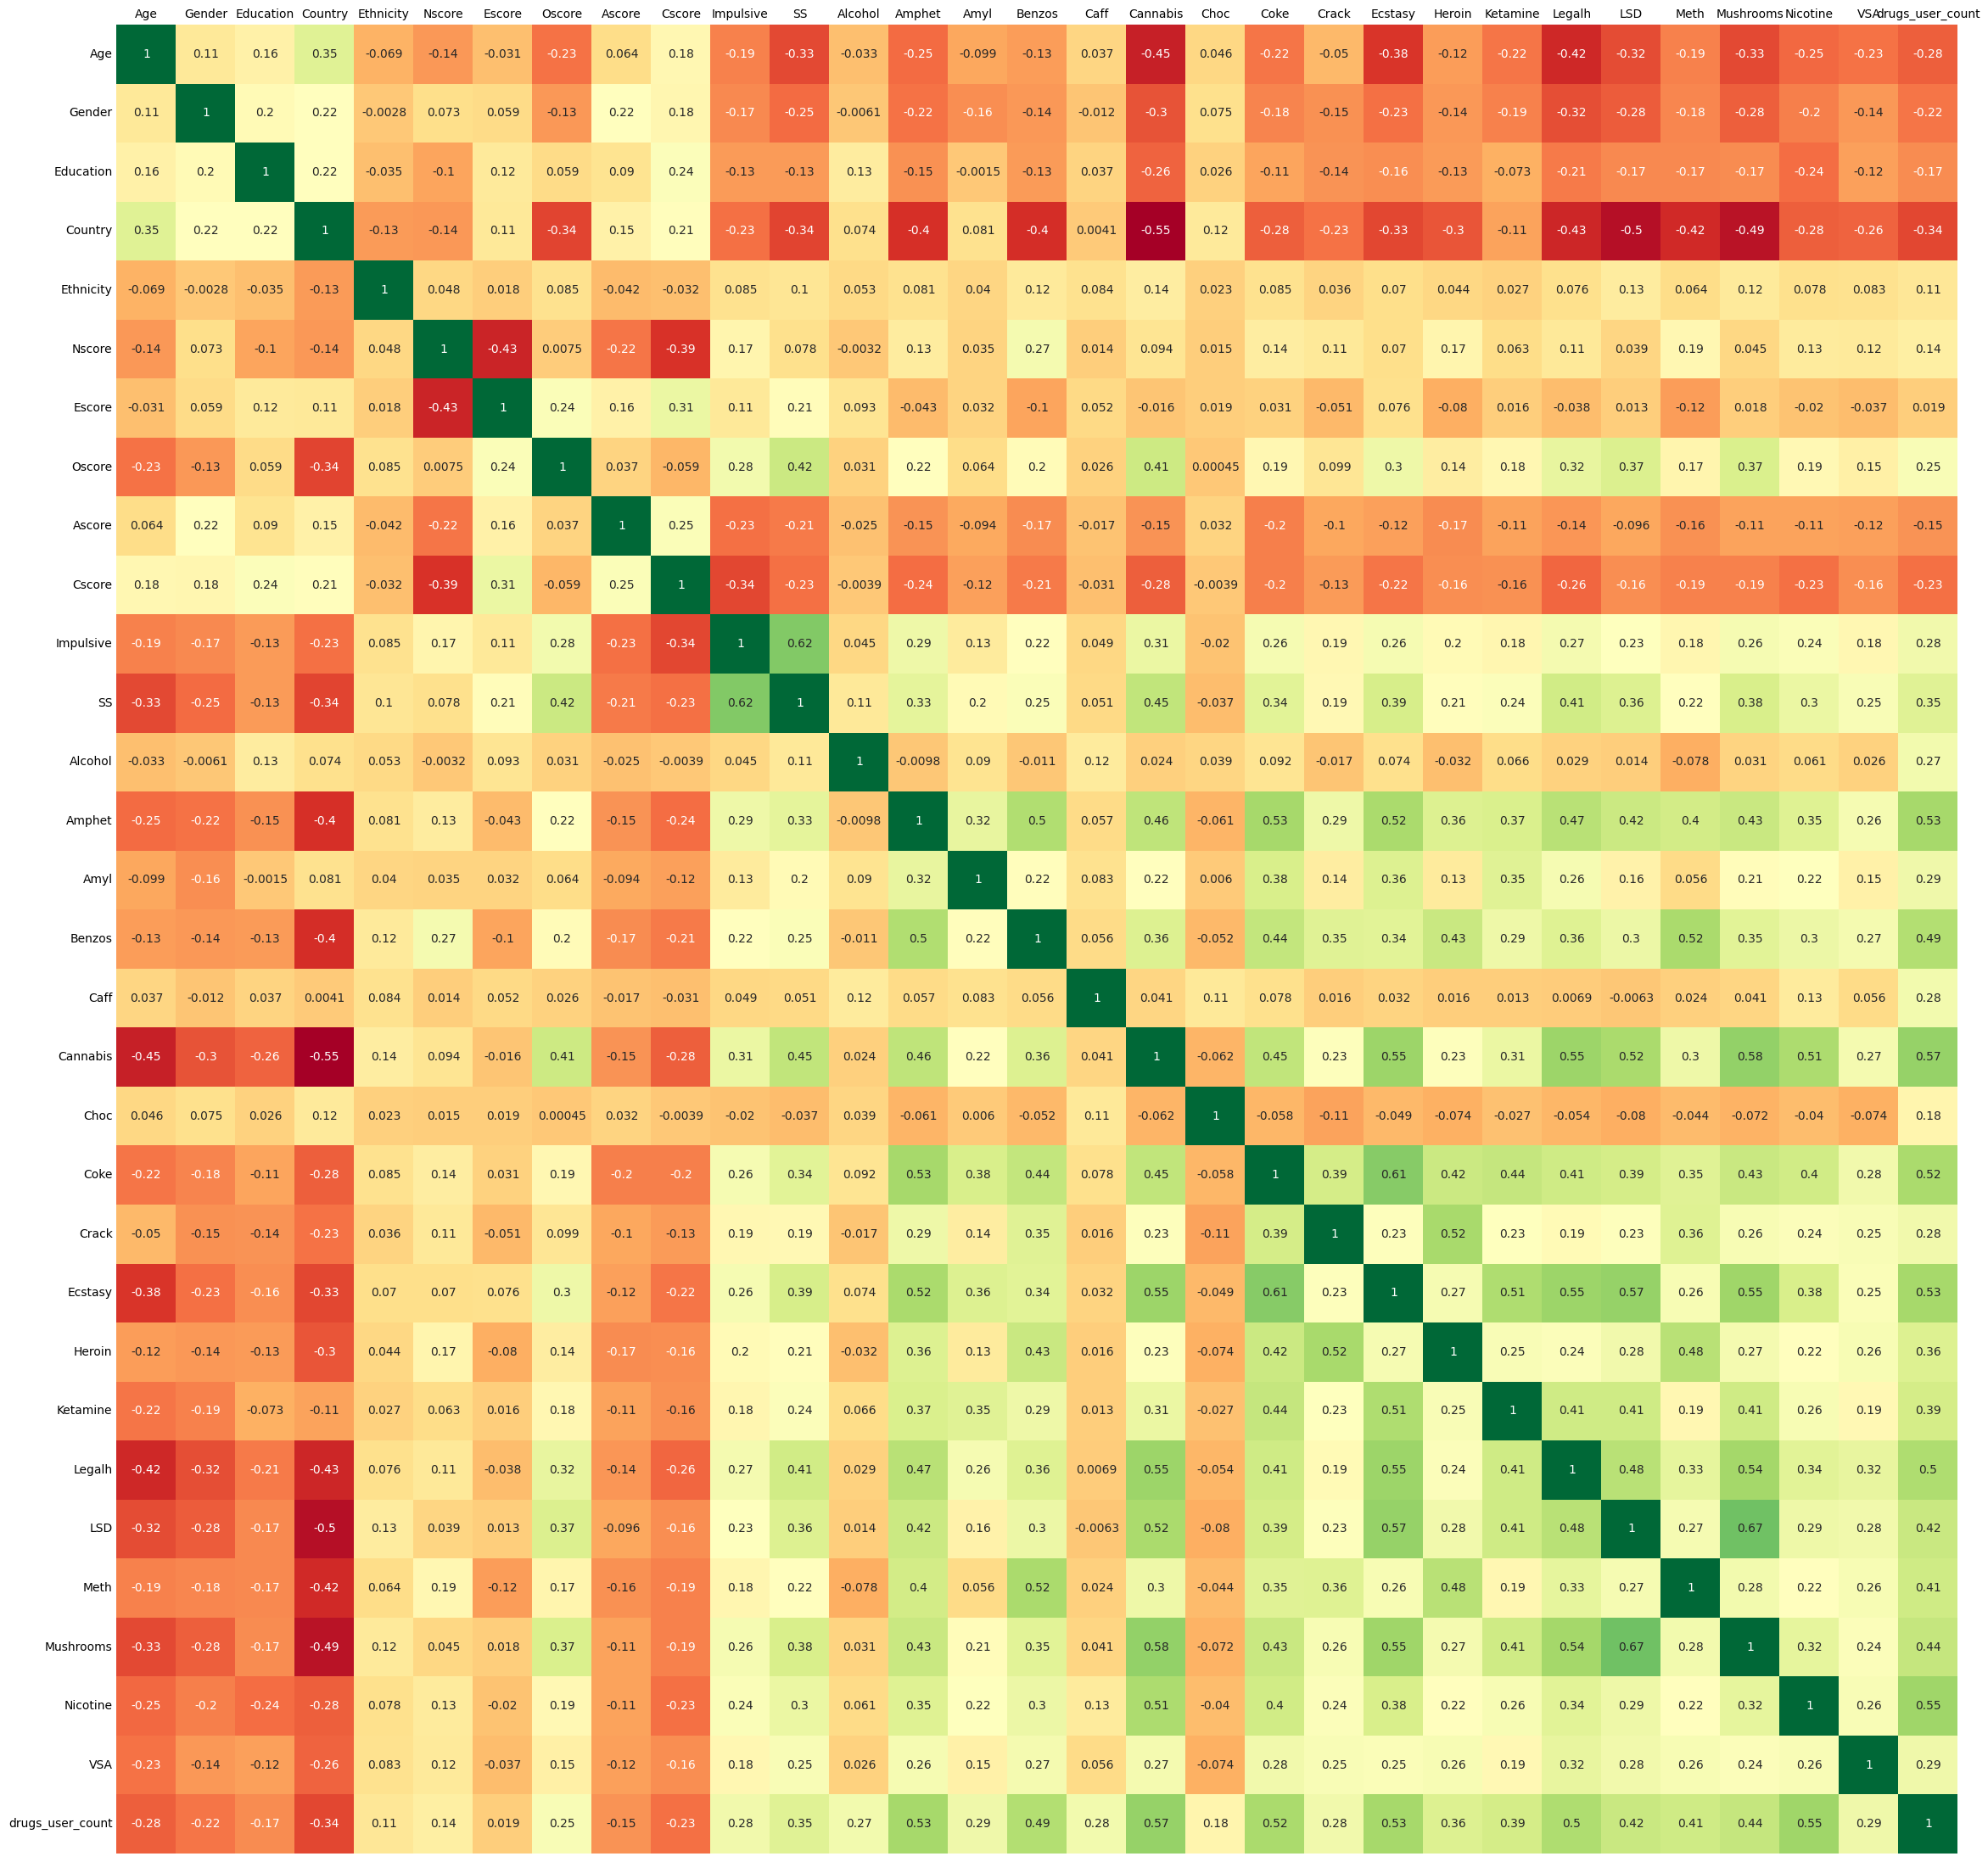

In [16]:
f, ax = plt.subplots(figsize=(28, 28))

columns_to_remove = [col for col in data.columns if any(col == label + '_user' for label in drugs_labels)]
columns_to_remove.append('ID')
sns.heatmap(data.drop(columns=columns_to_remove, axis=1).corr(), cmap = 'RdYlGn', annot=True, cbar=False)
ax.tick_params(length=0)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

Si ottengono risultati simili usando l'indice di correlazione di Pearson (default Spearmann).
```
data.drop('ID', axis=1).corr(method='pearson')
```

### Formulazione domande di analisi

-- miei --
- dai dati sulla persona e personalità, capire il rischio di essere utilizzatori o meno di quella droga (e anche la frequenza?) 
  - prendere tutti i dati insieme per ogni droga oppure solo alcuni indicatori per volta?
- quantità di droghe consumate in base ai dati sulla persona e personalità
- correlazione tra droghe legali e non
- tendenza uso droghe, alcune sembrano non essere praticamente più utilizzate di recente 

-- da riunione con prof --
- una regressione logistica : forti consumatori di una droga collegata ai tratti della personalità (per alcune droghe tipo 1,2)
- una regressione lineare : consumatori di una droga a partire da un'altra 
- regressione lineare quantità di droghe consumate in base ai dati sulla persona: provare ma non ci saranno grandi risultati

- formare delle classi con un po' di buonsenso creando delle etichette (es. forti consumatori CL5 e CL6, non forti consumatori tutto il resto) e poi a partire da qualche dato vedere se si riesce a ritrovare la stessa classificazione



### Regressione

In [17]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [18]:
def print_metrics_logistic(Y_train, pred_train, Y_test, pred_test, classes):
    fig, axs = plt.subplots(2, 2, figsize=(13,13))

    for idx, (Y, pred, title) in enumerate(zip([Y_train, Y_test], [pred_train, pred_test], ["Train Confusion Matrix", "Test Confusion Matrix"])):
        cf_matrix = confusion_matrix(Y, pred)
        sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels=classes, cmap='cividis',
                    yticklabels=classes, ax=axs[0, idx]).set_title(title)
        
        metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
        results = [precision_score(Y, pred), 
                   recall_score(Y, pred), 
                   f1_score(Y, pred),
                   accuracy_score(Y, pred)]
        
        g = sns.barplot(x=metrics, y=results, ax=axs[1, idx])
        g.set_yticks(np.arange(0, 1.01, 0.05))
        
    print("Train Accuracy: ", accuracy_score(Y_train, pred_train))
    print("Test Accuracy: ", accuracy_score(Y_test, pred_test))

def print_metrics_linear(Y_train, pred_train, Y_test, pred_test, residuals, fitted_values):
    #sns.residplot(x=fitted_values, y=residuals, lowess=True)
    #plt.title('Grafico di Controllo Residui vs. Valori Predetti')
    #plt.xlabel('Valori Predetti')
    #plt.ylabel('Residui Standardizzati')
    #plt.show()

    plt.scatter(fitted_values, residuals)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    plt.title('Grafico dei Residui')
    plt.xlabel('Valori Predetti')
    plt.ylabel('Residui')
    plt.show()
        
    print("Train Accuracy: ", accuracy_score(Y_train, pred_train))
    print("Test Accuracy: ", accuracy_score(Y_test, pred_test))

#### Regressione Lineare

In [19]:
def backward_elimination_linear(train_data, target_variable):
    feature_string = '+'.join([feature for feature in train_data.columns.drop('ID') if feature != target_variable and feature != target_variable.replace("_user", "") and "_user" not in feature])
    formula = target_variable + " ~ " + feature_string
    model = ols(formula, train_data).fit(disp=False)          
    print("Adjusted R^2:", model.rsquared_adj)
    
    removed_features = []
    x_vars = feature_string.split("+")

    while model.pvalues.drop("Intercept").max() > 0.1:
        feature_to_remove = model.pvalues.drop("Intercept").idxmax()
        removed_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        formula = target_variable + " ~ " + '+'.join(x_vars)
        model = ols(formula, train_data).fit(disp=False) 

    print("Removed features: ", removed_features)
    return model

def linear_regression(train_data, dependent_variable):
    model = backward_elimination_linear(train_data, dependent_variable)
    print(model.summary())
    return model

In [20]:
target_variable = "drugs_user_count"
model = linear_regression(train_set, target_variable)

Adjusted R^2: 0.6903371360344226
Removed features:  ['Ascore', 'VSA', 'Education', 'Cscore', 'Gender', 'Coke', 'Nscore', 'Crack', 'Age', 'Amyl', 'Impulsive', 'SS', 'Ketamine']
                            OLS Regression Results                            
Dep. Variable:       drugs_user_count   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:15:36   Log-Likelihood:                -1974.7
No. Observations:                1501   AIC:                             3985.
Df Residuals:                    1483   BIC:                             4081.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

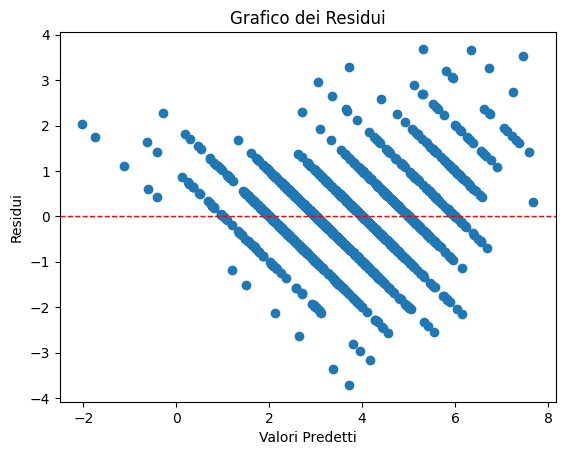

Train Accuracy:  0.502998001332445
Test Accuracy:  0.4946808510638298


In [21]:
train_probs = model.predict(train_set)
train_pred = train_probs.round().astype(int)

test_probs = model.predict(test_set)
test_pred = test_probs.round().astype(int)

print_metrics_linear(train_set[target_variable], train_pred, test_set[target_variable], test_pred, residuals=model.resid, fitted_values=model.fittedvalues)

#### Regressione Logistica

In [22]:
def backward_elimination_logistic(train_data, target_variable):
    feature_string = '+'.join([feature for feature in train_data.columns.drop('ID') if feature != target_variable and feature != target_variable.replace("_user", "") and "_user" not in feature])
    formula = target_variable + " ~ " + feature_string
    model = logit(formula, train_data).fit(disp=False)          
    print("Pseudo R^2:", model.prsquared)
    
    removed_features = []
    x_vars = feature_string.split("+")

    while model.pvalues.drop("Intercept").max() > 0.1:
        feature_to_remove = model.pvalues.drop("Intercept").idxmax()
        removed_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        formula = target_variable + " ~ " + '+'.join(x_vars)
        model = logit(formula, train_data).fit(disp=False) 

    print("Removed features: ", removed_features)
    return model

def logistic_regression(train_data, dependent_variable):
    model = backward_elimination_logistic(train_data, dependent_variable)
    print(model.summary())
    return model

In [23]:
target_variable = "Cannabis_user"
model = logistic_regression(train_set, target_variable)

Pseudo R^2: 0.3543289380998701
Removed features:  ['Ethnicity', 'Cscore', 'Impulsive', 'Choc', 'Ascore', 'Crack', 'Amyl', 'VSA', 'SS', 'Caff', 'LSD', 'Escore', 'Amphet', 'Alcohol', 'Meth', 'Benzos', 'Ketamine']
                           Logit Regression Results                           
Dep. Variable:          Cannabis_user   No. Observations:                 1501
Model:                          Logit   Df Residuals:                     1488
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.3462
Time:                        00:15:37   Log-Likelihood:                -634.41
converged:                       True   LL-Null:                       -970.35
Covariance Type:            nonrobust   LLR p-value:                4.553e-136
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

Train Accuracy:  0.7828114590273151
Test Accuracy:  0.824468085106383


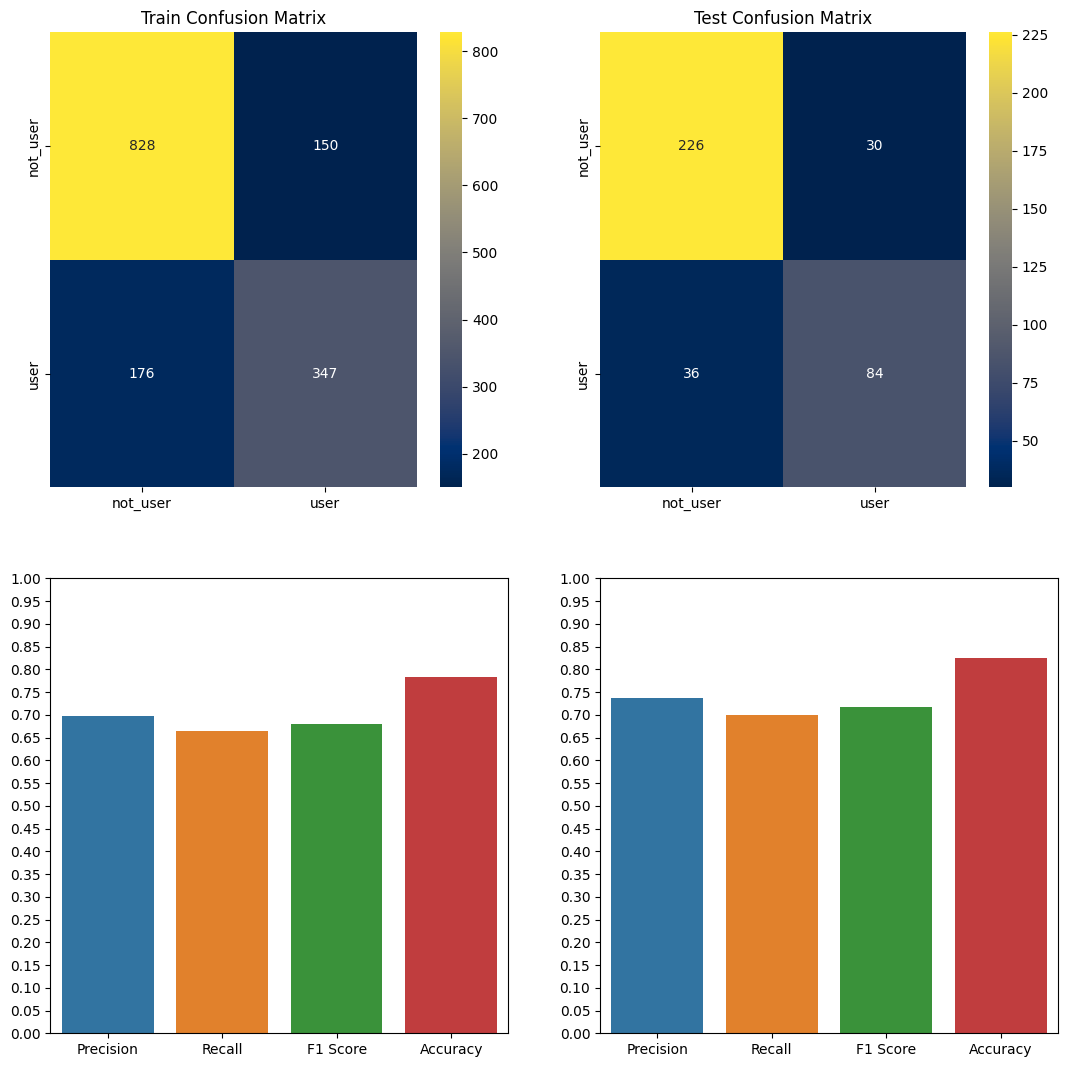

In [24]:
train_probs = model.predict(train_set)
train_pred = train_probs.round().astype(int)

test_probs = model.predict(test_set)
test_pred = test_probs.round().astype(int)

print_metrics_logistic(train_set[target_variable], train_pred, test_set[target_variable], test_pred, classes=["not_user", "user"])

### Classificazione

In [25]:
def show_pca_var_plot(pca):
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5,
            align='center', label='% of explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

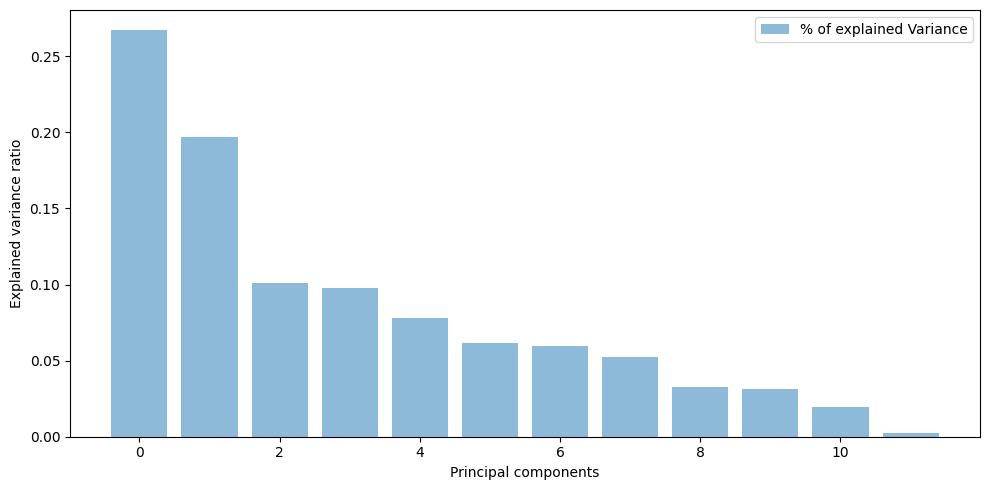

array([0.26708723, 0.46406263, 0.56489387, 0.66247699, 0.74043241,
       0.80203083, 0.86196112, 0.91432947, 0.94680093, 0.97797007,
       0.99769302, 1.        ])

In [26]:
pca=PCA()
pca.fit(train_set[person_labels])
Y=pca.transform(train_set[person_labels])
show_pca_var_plot(pca)
np.cumsum(pca.explained_variance_ratio_)

### Clustering

### Conclusioni